In [24]:
from pathlib import Path
import pandas as pd

txt_fp = Path("/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/reeftruth/data/prism/roelfsema-phinn_2013.txt")
# read in textfile (tab=separated)

with open(txt_fp, "r") as f:
    lines = f.readlines()

header_lines = 11
# read header
header = lines[:header_lines]
header = [line.strip().split("\t") for line in header]

# read data (not header) into dataframe
data = lines[header_lines:]
data = [line.strip().split("\t") for line in data]
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8
0,02_Chlorodesmis * LATITUDE: -23.434600 * LONGI...,None,None,None,None,None,None,None,None
1,03_Montipora-blue * LATITUDE: -23.434600 * LON...,None,None,None,None,None,None,None,None
2,04_Montipora-brown * LATITUDE: -23.434600 * LO...,None,None,None,None,None,None,None,None
3,05_Gorgonian * LATITUDE: -23.434600 * LONGITUD...,None,None,None,None,None,None,None,None
4,06_Soft-coral * LATITUDE: -23.434600 * LONGITU...,None,None,None,None,None,None,None,None


In [44]:
# split by tab
data = lines[header_lines:]

start = 120
data = [line.strip().split("\t") for line in data]
data[start:start+2]

[['01_Montipora',
  '2006-06-25T14:00',
  'Blue Pools, Heron Reef, Australia',
  '-23.434600',
  '151.921967',
  '-5',
  '400.34',
  '0.00',
  'Live Montipora sp. coral - Fiber optic cable thickness: 100 [?m], integration time: 150 [ms], distance to subject: 5 [cm]'],
 ['01_Montipora',
  '2006-06-25T14:00',
  'Blue Pools, Heron Reef, Australia',
  '-23.434600',
  '151.921967',
  '-5',
  '400.71',
  '0.00',
  'Live Montipora sp. coral - Fiber optic cable thickness: 100 [?m], integration time: 150 [ms], distance to subject: 5 [cm]']]

In [194]:
# convert to dataframe, inferring types
coral_spectra = data[full_header_lines:]
column_names = ['Event',
  'Date/Time',
  'Location',
  'Latitude',
  'Longitude',
  'Elevation [m]',
  'Lambda [nm]',
  'Refl tot',
  'Comment']

df = pd.DataFrame(coral_spectra, columns=column_names)
# cast types
df["Date/Time"] = pd.to_datetime(df["Date/Time"])
df["Lambda [nm]"] = df["Lambda [nm]"].astype(float)
df["Latitude"] = df["Latitude"].astype(float)
df["Longitude"] = df["Longitude"].astype(float)
df["Refl tot"] = df["Refl tot"].astype(float)
df["Elevation [m]"] = df["Elevation [m]"].astype(float)

df.head()

,Event,Date/Time,Location,Latitude,Longitude,Elevation [m],Lambda [nm],Refl tot,Comment
0,01_Montipora,2006-06-25 14:00:00,"Blue Pools, Heron Reef, Australia",-23.4346,151.921967,-5.0,400.34,0.00,Live Montipora sp. coral - Fiber optic cable t...
1,01_Montipora,2006-06-25 14:00:00,"Blue Pools, Heron Reef, Australia",-23.4346,151.921967,-5.0,400.71,0.00,Live Montipora sp. coral - Fiber optic cable t...
2,01_Montipora,2006-06-25 14:00:00,"Blue Pools, Heron Reef, Australia",-23.4346,151.921967,-5.0,401.08,0.00,Live Montipora sp. coral - Fiber optic cable t...
3,01_Montipora,2006-06-25 14:00:00,"Blue Pools, Heron Reef, Australia",-23.4346,151.921967,-5.0,401.46,0.00,Live Montipora sp. coral - Fiber optic cable t...
4,01_Montipora,2006-06-25 14:00:00,"Blue Pools, Heron Reef, Australia",-23.4346,151.921967,-5.0,401.83,0.13,Live Montipora sp. coral - Fiber optic cable t...


In [206]:
# get all the metadata for each event
metadata = df.groupby("Event").first().drop(columns=["Lambda [nm]", "Refl tot"])
# make metadata a mulitindex 
metadata_multiindex = pd.MultiIndex(levels=[["Metadata"], metadata.columns], codes=[[0]*len(metadata.columns), range(len(metadata.columns))])
metadata.columns = metadata_multiindex
metadata.head()

Metadata                                     \
                             Date/Time                           Location   
Event                                                                       
01_Montipora       2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
02_Chlorodesmis    2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
03_Montipora-blue  2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
04_Montipora-brown 2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
05_Gorgonian       2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   

                                                       \
                   Latitude   Longitude Elevation [m]   
Event                                                   
01_Montipora       -23.4346  151.921967          -5.0   
02_Chlorodesmis    -23.4346  151.921967          -5.0   
03_Montipora-blue  -23.4346  151.921967          -5.0   
04_Montipora-brown -23.4346  151.921967          -5.0   
05_Gorgonian       -23.4346  151.921967          -5.0   

                                                                       
                                                              Comment  
Event                                                                  
01_Montipora        Live Montipora sp. coral - Fiber optic cable t...  
02_Chlorodesmis     Chlorodesmis sp.(Algae) - Fiber optic cable th...  
03_Montipora-blue   Live Montipora sp. coral with blue color - Fib...  
04_Montipora-brown  Live Montipora sp. coral with brown color - Fi...  
05_Gorgonian        Gorgonian - Fiber optic cable thickness: 100 [...

In [207]:
# get all the lambda values
lambdas = df.groupby("Event")["Lambda [nm]"].apply(list).iloc[0]
# make dataframe with lambda[0] as column headers and refl tot as values
spectra = df.groupby("Event")["Refl tot"].apply(list)
spectra = spectra.reset_index().set_index("Event")
spectra = spectra["Refl tot"].apply(pd.Series)
# label columns with lambdas from df
spectra.columns = lambdas
# make multiindex (spectrum, lambda values)
spectra_multiindex = pd.MultiIndex(levels=[["Spectrum"], spectra.columns], codes=[[0]*len(spectra.columns), range(len(spectra.columns))])
spectra.columns = spectra_multiindex
spectra.head()

Spectrum                                                   \
                     400.34 400.71 401.08 401.46 401.83 402.20 402.57 402.94   
Event                                                                          
01_Montipora            0.0    0.0    0.0    0.0   0.13   0.13   0.13   0.13   
02_Chlorodesmis         0.0    0.0    0.0    0.0   0.00   0.00   0.00   0.00   
03_Montipora-blue       0.0    0.0    0.0    0.0   0.08   0.08   0.08   0.08   
04_Montipora-brown      0.0    0.0    0.0    0.0   0.03   0.03   0.03   0.03   
05_Gorgonian            0.0    0.0    0.0    0.0   0.02   0.02   0.02   0.02   

                                  ...                                     \
                   403.31 403.68  ... 797.38 797.71 798.03 798.36 798.68   
Event                             ...                                      
01_Montipora         0.14   0.14  ...   1.09   1.09   1.09   1.09   1.09   
02_Chlorodesmis      0.00   0.00  ...   0.37   0.37   0.37   0.37   0.37   
03_Montipora-blue    0.08   0.08  ...   0.60   0.60   0.60   0.59   0.60   
04_Montipora-brown   0.03   0.03  ...   0.88   0.88   0.88   0.88   0.88   
05_Gorgonian         0.03   0.03  ...   0.89   0.89   0.88   0.88   0.88   

                                                       
                   799.01 799.33 799.65 799.98 800.30  
Event                                                  
01_Montipora          0.0    0.0    0.0    0.0    0.0  
02_Chlorodesmis       0.0    0.0    0.0    0.0    0.0  
03_Montipora-blue     0.0    0.0    0.0    0.0    0.0  
04_Montipora-brown    0.0    0.0    0.0    0.0    0.0  
05_Gorgonian          0.0    0.0    0.0    0.0    0.0  

[5 rows x 1146 columns]

In [230]:
df

,Event,Date/Time,Location,Latitude,Longitude,Elevation [m],Lambda [nm],Refl tot,Comment
0,01_Montipora,2006-06-25 14:00:00,"Blue Pools, Heron Reef, Australia",-23.43460,151.921967,-5.0,400.34,0.00,Live Montipora sp. coral - Fiber optic cable t...
1,01_Montipora,2006-06-25 14:00:00,"Blue Pools, Heron Reef, Australia",-23.43460,151.921967,-5.0,400.71,0.00,Live Montipora sp. coral - Fiber optic cable t...
2,01_Montipora,2006-06-25 14:00:00,"Blue Pools, Heron Reef, Australia",-23.43460,151.921967,-5.0,401.08,0.00,Live Montipora sp. coral - Fiber optic cable t...
3,01_Montipora,2006-06-25 14:00:00,"Blue Pools, Heron Reef, Australia",-23.43460,151.921967,-5.0,401.46,0.00,Live Montipora sp. coral - Fiber optic cable t...
4,01_Montipora,2006-06-25 14:00:00,"Blue Pools, Heron Reef, Australia",-23.43460,151.921967,-5.0,401.83,0.13,Live Montipora sp. coral - Fiber optic cable t...
...,...,...,...,...,...,...,...,...,...
120179,99_Turf-on-massive,2006-06-30 14:00:00,"Bommie, Heron Reef, Australia",-23.44135,151.905167,-5.0,799.01,0.00,Turf on dead massive coral - Fiber optic cable...
120180,99_Turf-on-massive,2006-06-30 14:00:00,"Bommie, Heron Reef, Australia",-23.44135,151.905167,-5.0,799.33,0.00,Turf on dead massive coral - Fiber optic cable...
120181,99_Turf-on-massive,2006-06-30 14:00:00,"Bommie, Heron Reef, Australia",-23.44135,151.905167,-5.0,799.65,0.00,Turf on dead massive coral - Fiber optic cable...
120182,99_Turf-on-massive,2006-06-30 14:00:00,"Bommie, Heron Reef, Australia",-23.44135,151.905167,-5.0,799.98,0.00,Turf on dead massive coral - Fiber optic cable...


In [231]:
df["Elevation [m]"].unique()

array([-5., -9., -1.])

In [208]:
# join metadata and spectra on Event
combined = metadata.join(spectra)
combined

Metadata                                     \
                             Date/Time                           Location   
Event                                                                       
01_Montipora       2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
02_Chlorodesmis    2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
03_Montipora-blue  2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
04_Montipora-brown 2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
05_Gorgonian       2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
...                                ...                                ...   
95_Brown-acropora  2006-06-30 14:00:00      Bommie, Heron Reef, Australia   
96_Sponge          2006-06-30 14:00:00      Bommie, Heron Reef, Australia   
97_Blue-acropora   2006-06-30 14:00:00      Bommie, Heron Reef, Australia   
98_Pink-sponge     2006-06-30 14:00:00      Bommie, Heron Reef, Australia   
99_Turf-on-massive 2006-06-30 14:00:00      Bommie, Heron Reef, Australia   

                                                        \
                    Latitude   Longitude Elevation [m]   
Event                                                    
01_Montipora       -23.43460  151.921967          -5.0   
02_Chlorodesmis    -23.43460  151.921967          -5.0   
03_Montipora-blue  -23.43460  151.921967          -5.0   
04_Montipora-brown -23.43460  151.921967          -5.0   
05_Gorgonian       -23.43460  151.921967          -5.0   
...                      ...         ...           ...   
95_Brown-acropora  -23.44135  151.905167          -5.0   
96_Sponge          -23.44135  151.905167          -5.0   
97_Blue-acropora   -23.44135  151.905167          -5.0   
98_Pink-sponge     -23.44135  151.905167          -5.0   
99_Turf-on-massive -23.44135  151.905167          -5.0   

                                                                       \
                                                              Comment   
Event                                                                   
01_Montipora        Live Montipora sp. coral - Fiber optic cable t...   
02_Chlorodesmis     Chlorodesmis sp.(Algae) - Fiber optic cable th...   
03_Montipora-blue   Live Montipora sp. coral with blue color - Fib...   
04_Montipora-brown  Live Montipora sp. coral with brown color - Fi...   
05_Gorgonian        Gorgonian - Fiber optic cable thickness: 100 [...   
...                                                               ...   
95_Brown-acropora   Live Acropora sp.coral with brown color - Fibe...   
96_Sponge           Sponge - Fiber optic cable thickness: 200 [?m]...   
97_Blue-acropora    Live Acropora sp. coral with blue color - Fibe...   
98_Pink-sponge      Sponge with pink color - Fiber optic cable thi...   
99_Turf-on-massive  Turf on dead massive coral - Fiber optic cable...   

                   Spectrum                       ...                       \
                     400.34 400.71 401.08 401.46  ... 797.38 797.71 798.03   
Event                                             ...                        
01_Montipora            0.0    0.0    0.0    0.0  ...   1.09   1.09   1.09   
02_Chlorodesmis         0.0    0.0    0.0    0.0  ...   0.37   0.37   0.37   
03_Montipora-blue       0.0    0.0    0.0    0.0  ...   0.60   0.60   0.60   
04_Montipora-brown      0.0    0.0    0.0    0.0  ...   0.88   0.88   0.88   
05_Gorgonian            0.0    0.0    0.0    0.0  ...   0.89   0.89   0.88   
...                     ...    ...    ...    ...  ...    ...    ...    ...   
95_Brown-acropora       0.0    0.0    0.0    0.0  ...   0.71   0.70   0.70   
96_Sponge               0.0    0.0    0.0    0.0  ...   0.68   0.68   0.68   
97_Blue-acropora        0.0    0.0    0.0    0.0  ...   0.53   0.53   0.53   
98_Pink-sponge          0.0    0.0    0.0    0.0  ...   0.31   0.31   0.32   
99_Turf-on-massive      0.0    0.0    0.0    0.0  ...   0.68   0.69   0.68   

                      

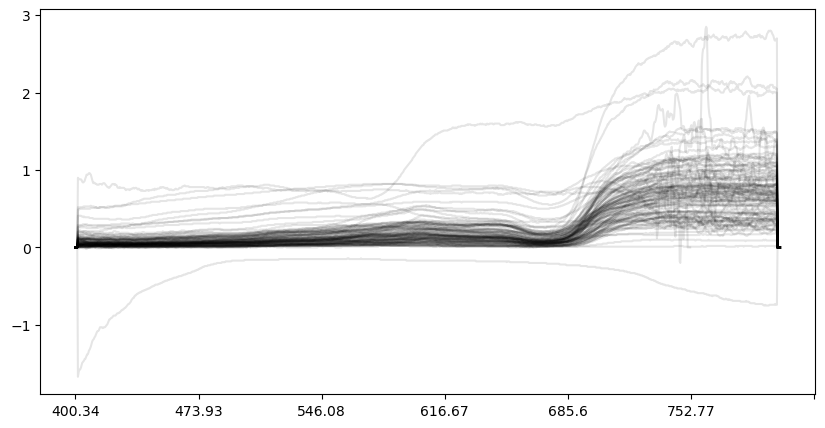

In [224]:
# plot spectra
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
combined["Spectrum"].T.plot(ax=ax, c="black", alpha=0.1)
# remove legend
ax.get_legend().remove()


In [225]:
combined

Metadata                                     \
                             Date/Time                           Location   
Event                                                                       
01_Montipora       2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
02_Chlorodesmis    2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
03_Montipora-blue  2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
04_Montipora-brown 2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
05_Gorgonian       2006-06-25 14:00:00  Blue Pools, Heron Reef, Australia   
...                                ...                                ...   
95_Brown-acropora  2006-06-30 14:00:00      Bommie, Heron Reef, Australia   
96_Sponge          2006-06-30 14:00:00      Bommie, Heron Reef, Australia   
97_Blue-acropora   2006-06-30 14:00:00      Bommie, Heron Reef, Australia   
98_Pink-sponge     2006-06-30 14:00:00      Bommie, Heron Reef, Australia   
99_Turf-on-massive 2006-06-30 14:00:00      Bommie, Heron Reef, Australia   

                                                        \
                    Latitude   Longitude Elevation [m]   
Event                                                    
01_Montipora       -23.43460  151.921967          -5.0   
02_Chlorodesmis    -23.43460  151.921967          -5.0   
03_Montipora-blue  -23.43460  151.921967          -5.0   
04_Montipora-brown -23.43460  151.921967          -5.0   
05_Gorgonian       -23.43460  151.921967          -5.0   
...                      ...         ...           ...   
95_Brown-acropora  -23.44135  151.905167          -5.0   
96_Sponge          -23.44135  151.905167          -5.0   
97_Blue-acropora   -23.44135  151.905167          -5.0   
98_Pink-sponge     -23.44135  151.905167          -5.0   
99_Turf-on-massive -23.44135  151.905167          -5.0   

                                                                       \
                                                              Comment   
Event                                                                   
01_Montipora        Live Montipora sp. coral - Fiber optic cable t...   
02_Chlorodesmis     Chlorodesmis sp.(Algae) - Fiber optic cable th...   
03_Montipora-blue   Live Montipora sp. coral with blue color - Fib...   
04_Montipora-brown  Live Montipora sp. coral with brown color - Fi...   
05_Gorgonian        Gorgonian - Fiber optic cable thickness: 100 [...   
...                                                               ...   
95_Brown-acropora   Live Acropora sp.coral with brown color - Fibe...   
96_Sponge           Sponge - Fiber optic cable thickness: 200 [?m]...   
97_Blue-acropora    Live Acropora sp. coral with blue color - Fibe...   
98_Pink-sponge      Sponge with pink color - Fiber optic cable thi...   
99_Turf-on-massive  Turf on dead massive coral - Fiber optic cable...   

                   Spectrum                       ...                       \
                     400.34 400.71 401.08 401.46  ... 797.38 797.71 798.03   
Event                                             ...                        
01_Montipora            0.0    0.0    0.0    0.0  ...   1.09   1.09   1.09   
02_Chlorodesmis         0.0    0.0    0.0    0.0  ...   0.37   0.37   0.37   
03_Montipora-blue       0.0    0.0    0.0    0.0  ...   0.60   0.60   0.60   
04_Montipora-brown      0.0    0.0    0.0    0.0  ...   0.88   0.88   0.88   
05_Gorgonian            0.0    0.0    0.0    0.0  ...   0.89   0.89   0.88   
...                     ...    ...    ...    ...  ...    ...    ...    ...   
95_Brown-acropora       0.0    0.0    0.0    0.0  ...   0.71   0.70   0.70   
96_Sponge               0.0    0.0    0.0    0.0  ...   0.68   0.68   0.68   
97_Blue-acropora        0.0    0.0    0.0    0.0  ...   0.53   0.53   0.53   
98_Pink-sponge          0.0    0.0    0.0    0.0  ...   0.31   0.31   0.32   
99_Turf-on-massive      0.0    0.0    0.0    0.0  ...   0.68   0.69   0.68   

                      

In [113]:
# make series of lists into a dataframe with a column names the value of Lambda [nm], values "Refl tot" for each list value
spectra_df = pd.DataFrame(df["Refl tot"].values.tolist(), columns=metadata["Lambda [nm]"].iloc[0], index=metadata["Event"])
spectra_df

ValueError: Shape of passed values is (120184, 1), indices imply (105, 1146)

In [73]:
lambda_df = pd.DataFrame(index = metadata.Event, columns = metadata["Lambda [nm]"])
lambda_df

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

In [29]:
import pandas as pd

# Example text data (replace this with reading from your text file)
data = [
    ['02_Chlorodesmis * LATITUDE: -23.434600 * LONGITUDE: 151.921967 * DATE/TIME: 2006-06-25T14:00:00 * ELEVATION: -5.0 m * LOCATION: Blue Pools, Heron Reef, Australia * METHOD/DEVICE: Spectrophotometer (SPEC) * COMMENT: Chlorodesmis sp.(Algae) - Fiber optic cable thickness: 100 [?m], integration time: 100 [ms], distance to subject: 5 [cm]'],
    ['03_Montipora-blue * LATITUDE: -23.434600 * LONGITUDE: 151.921967 * DATE/TIME: 2006-06-25T14:00:00 * ELEVATION: -5.0 m * LOCATION: Blue Pools, Heron Reef, Australia * METHOD/DEVICE: Spectrophotometer (SPEC) * COMMENT: Live Montipora sp. coral with blue color - Fiber optic cable thickness: 100 [?m], integration time: 100 [ms], distance to subject: 5 [cm]'],
    ['04_Montipora-brown * LATITUDE: -23.434600 * LONGITUDE: 151.921967 * DATE/TIME: 2006-06-25T14:00:00 * ELEVATION: -5.0 m * LOCATION: Blue Pools, Heron Reef, Australia * METHOD/DEVICE: Spectrophotometer (SPEC) * COMMENT: Live Montipora sp. coral with brown color - Fiber optic cable thickness: 100 [?m], integration time: 100 [ms], distance to subject: 5 [cm]']
]

# Define the columns
columns = ['Sample', 'Latitude', 'Longitude', 'Date/Time', 'Elevation', 'Location', 'Method/Device', 'Comment']

# Initialize an empty list to hold the data rows
rows = []

# Iterate over each entry in the data
for entry in data:
    # Split the entry by ' * ' to separate fields
    fields = entry[0].split(' * ')
    
    # Create a dictionary with keys as column names and values from the fields
    row = {
        'Sample': fields[0].strip(),
        'Latitude': fields[1].split(': ')[1].strip(),
        'Longitude': fields[2].split(': ')[1].strip(),
        'Date/Time': fields[3].split(': ')[1].strip(),
        'Elevation': fields[4].split(': ')[1].strip(),
        'Location': fields[5].split(': ')[1].strip(),
        'Method/Device': fields[6].split(': ')[1].strip(),
        'Comment': fields[7].split(': ')[1].strip(),
    }
    
    # Append the dictionary to the rows list
    rows.append(row)

# Create the DataFrame
df = pd.DataFrame(rows, columns=columns)
df

,Sample,Latitude,Longitude,Date/Time,Elevation,Location,Method/Device,Comment
0,02_Chlorodesmis,-23.434600,151.921967,2006-06-25T14:00:00,-5.0 m,"Blue Pools, Heron Reef, Australia",Spectrophotometer (SPEC),Chlorodesmis sp.(Algae) - Fiber optic cable th...
1,03_Montipora-blue,-23.434600,151.921967,2006-06-25T14:00:00,-5.0 m,"Blue Pools, Heron Reef, Australia",Spectrophotometer (SPEC),Live Montipora sp. coral with blue color - Fib...
2,04_Montipora-brown,-23.434600,151.921967,2006-06-25T14:00:00,-5.0 m,"Blue Pools, Heron Reef, Australia",Spectrophotometer (SPEC),Live Montipora sp. coral with brown color - Fi...
